<b style='font-size:150%'>Dataset Description</b>

|Features|Description|
|-------|-----------|
|`SalePrice:`|the property's sale price in dollars. This is the target variable that you're trying to predict.|
|`MSSubClass:`|The building class|
|`LotFrontage:`|The general zoning classification|
|`MSZoning:`|Linear feet of street connected to property|
|`LotArea:`|Lot size in square feet|
|`Street:`|Type of road access|
|`Alley:`|Type of alley access|
|`LotShape:`|General shape of property|
|`LandContour:`|Flatness of the property|
|`Utilities:`|Type of utilities available|
|`LotConfig:`|Lot configuration|
|`LandSlope:`|Slope of property|
|`Neighborhood:`|Physical locations within Ames city limits|
|`Condition1:`|Proximity to main road or railroad|
|`Condition2:`|Proximity to main road or railroad (if a second is present)|
|`BldgType:`|Type of dwelling|
|`HouseStyle:`|Style of dwelling|
|`OverallQual:`|Overall material and finish quality|
|`OverallCond:`|Overall condition rating|
|`YearBuilt:`|Original construction date|
|`YearRemodAdd:`|Remodel date|
|`RoofStyle:`|Type of roof|
|`RoofMatl:`|Roof material|
|`Exterior1st:`|Exterior covering on house|
|`Exterior2nd:`|Exterior covering on house (if more than one material)|
|`MasVnrType:`|Masonry veneer type|
|`MasVnrArea:`|Masonry veneer area in square feet|
|`ExterQual:`|Exterior material quality|
|`ExterCond:`|Present condition of the material on the exterior|
|`Foundation:`|Type of foundation|
|`BsmtQual:`|Height of the basement|
|`BsmtCond:`|General condition of the basement|
|`BsmtExposure:`|Walkout or garden level basement walls|
|`BsmtFinType1:`|Quality of basement finished area|
|`BsmtFinSF1:`|Type 1 finished square feet|
|`BsmtFinType2:`|Quality of second finished area (if present)|
|`BsmtFinSF2:`|Type 2 finished square feet|
|`BsmtUnfSF:`|Unfinished square feet of basement area|
|`TotalBsmtSF:`|Total square feet of basement area|
|`Heating:`|Type of heating|
|`HeatingQC:`|Heating quality and condition|
|`CentralAir:`|Central air conditioning|
|`Electrical:`|Electrical system|
|`1stFlrSF:`|First Floor square feet|
|`2ndFlrSF:`|Second floor square feet|
|`LowQualFinSF:`|Low quality finished square feet (all floors)|
|`GrLivArea:`|Above grade (ground) living area square feet|
|`BsmtFullBath:`|Basement full bathrooms|
|`BsmtHalfBath:`|Basement half bathrooms|
|`FullBath:`|Full bathrooms above grade|
|`HalfBath:`|Half baths above grade|
|`Bedroom:`|Number of bedrooms above basement level|
|`Kitchen:`|Number of kitchens|
|`KitchenQual:`|Kitchen quality|
|`TotRmsAbvGrd:`|Total rooms above grade (does not include bathrooms)|
|`Functional:`|Home functionality rating|
|`Fireplaces:`|Number of fireplaces|
|`FireplaceQu:`|Fireplace quality|
|`GarageType:`|Garage location|
|`GarageYrBlt:`|Year garage was built|
|`GarageFinish:`|Interior finish of the garage|
|`GarageCars:`|Size of garage in car capacity|
|`GarageArea:`|Size of garage in square feet|
|`GarageQual:`|Garage quality|
|`GarageCond:`|Garage condition|
|`PavedDrive:`|Paved driveway|
|`WoodDeckSF:`|Wood deck area in square feet|
|`OpenPorchSF:`|Open porch area in square feet|
|`EnclosedPorch:`|Enclosed porch area in square feet|
|`3SsnPorch:`|Three season porch area in square feet|
|`ScreenPorch:`|Screen porch area in square feet|
|`PoolArea:`|Pool area in square feet|
|`PoolQC:`|Pool quality|
|`Fence:`|Fence quality|
|`MiscFeature:`|Miscellaneous feature not covered in other categories|
|`MiscVal:`|$Value of miscellaneous feature|
|`MoSold:`|Month Sold|
|`YrSold:`|Year Sold|
|`SaleType:`|Type of sale|
|`SaleCondition:`|Condition of sale|

# Importing Libraries

In [109]:
# import libraries
import numpy as np #for linear algebra
import pandas as pd #for csv, excel, ...etc files and DataFrames


import matplotlib.pyplot as plt #for Data visualization
%matplotlib inline

import seaborn as sns #for statistical visualization

from sklearn.preprocessing import LabelEncoder, StandardScaler #Data Preprocessing
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error

# Importing DataSet

In [110]:
#Training Dataset
Train_Data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

train_data=Train_Data.copy()
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [111]:
#Test Dataset
Test_Data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

test_data=Test_Data.copy()
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [112]:
#Drop First Column
train_data.drop('Id',axis=1,inplace=True)
test_data.drop('Id',axis=1,inplace=True)

In [113]:
#Column names
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# Data Cleaning

In [114]:
from sklearn.impute import SimpleImputer

In [115]:
def Data_Cleaning(Data):

    data=Data.copy()
    #check missing values
    missing_cols=[]
    for col in data.columns:
        if data[col].isna().sum() >0:
            missing_cols.append(col)
    print(f'Columns Containing Null Values:\n {missing_cols}')
    
    #Precentage of missing values in dataset
    precent=(data[missing_cols].isna().sum()/data.shape[0])*100
    print(f'\nPrecentage of missing values:\n{precent.sort_values(ascending=False)}')
    

    #Drop Columns that contain missing values > 50%
    Drop_Cols=pd.DataFrame(precent[precent>50]).index.to_list()
    print(f'Columns that contain missing values > 50%\n{Drop_Cols}')
    data.drop(Drop_Cols, axis=1, inplace=True)
    
    #missing values imputation
    new_missing_cols=[]
    for col in data.columns:
        if data[col].isna().sum() >0:
            new_missing_cols.append(col)

    #Categorical Columns
    cat_cols=[i for i in data.columns if data[i].dtypes == 'object']
    #Numerical Columns
    num_cols=[i for i in data.columns if data[i].dtypes == 'int64' or data[i].dtypes == 'float64']
    
    if cat_cols:
        print("\n missing values imputation for categorical data...")
        cat_imputer=SimpleImputer(missing_values=np.nan ,strategy='most_frequent')
        data[cat_cols]=cat_imputer.fit_transform(data[cat_cols])
        print(' Done.')
        
    if num_cols:
        print("\n missing values imputation for numerical data...")
        num_imputer=SimpleImputer(missing_values=np.nan ,strategy='mean')
        data[num_cols]=num_imputer.fit_transform(data[num_cols])
        print(' Done.')
            
    print("Check missing values after imputation...\n")
    print(data.isna().sum())
    return data

In [116]:
Train=Data_Cleaning(train_data)
Train.head()

Columns Containing Null Values:
 ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

Precentage of missing values:
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64
Columns that contain missing values > 50%
['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

 missing values imputation for categorical data...
 Done.

 missi

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0
2,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0
3,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0


<b>Final Decision</b>
- If the percentage of missing values is very high (> 50%) → Drop the column
- if else missing values imputation using `SimpleImputer`

In [117]:
Test=Data_Cleaning(test_data)
Test.head()

Columns Containing Null Values:
 ['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']

Precentage of missing values:
PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
MasVnrType      61.274846
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrArea       1.028101
MSZoning 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20.0,RH,80.0,11622.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,WD,Normal
1,20.0,RL,81.0,14267.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,WD,Normal
2,60.0,RL,74.0,13830.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,WD,Normal
3,60.0,RL,78.0,9978.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,WD,Normal
4,120.0,RL,43.0,5005.0,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,WD,Normal


<b>Final Decision</b>
- If the percentage of missing values is very high (> 50%) → Drop the column
- if else missing values imputation using `SimpleImputer`

In [118]:
#Check for duplicates
Train[Train.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [119]:
#Check for duplicates
Test[Test.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition


<b>Outliers</b>

In [120]:
def Outliers(Data):
    Num_Cols=[i for i in Data.columns if Data[i].dtypes=='int64' or Data[i].dtypes=='float64']
    
    for k,v in Data[Num_Cols].items():
        q1=v.quantile(0.25)
        q3=v.quantile(0.75)
        iqr=q3-q1
        v_col=v[(v<q1-1.5*iqr) | (v>q3+1.5*iqr)]
        percentage=(v_col.shape[0]/Train.shape[0])*100
        print(f'Column {k} outliers: {percentage : 0.2f}%')

In [121]:
print("------------------------------------Outliers in Train data----------------------------------")
Outliers(Train)

------------------------------------Outliers in Train data----------------------------------
Column MSSubClass outliers:  7.05%
Column LotFrontage outliers:  7.26%
Column LotArea outliers:  4.73%
Column OverallQual outliers:  0.14%
Column OverallCond outliers:  8.56%
Column YearBuilt outliers:  0.48%
Column YearRemodAdd outliers:  0.00%
Column MasVnrArea outliers:  6.71%
Column BsmtFinSF1 outliers:  0.48%
Column BsmtFinSF2 outliers:  11.44%
Column BsmtUnfSF outliers:  1.99%
Column TotalBsmtSF outliers:  4.18%
Column 1stFlrSF outliers:  1.37%
Column 2ndFlrSF outliers:  0.14%
Column LowQualFinSF outliers:  1.78%
Column GrLivArea outliers:  2.12%
Column BsmtFullBath outliers:  0.07%
Column BsmtHalfBath outliers:  5.62%
Column FullBath outliers:  0.00%
Column HalfBath outliers:  0.00%
Column BedroomAbvGr outliers:  2.40%
Column KitchenAbvGr outliers:  4.66%
Column TotRmsAbvGrd outliers:  2.05%
Column Fireplaces outliers:  0.34%
Column GarageYrBlt outliers:  0.07%
Column GarageCars outliers

In [122]:
print("------------------------------------Outliers in Test data----------------------------------")
Outliers(Test)

------------------------------------Outliers in Test data----------------------------------
Column MSSubClass outliers:  7.12%
Column LotFrontage outliers:  9.66%
Column LotArea outliers:  4.11%
Column OverallQual outliers:  0.14%
Column OverallCond outliers:  8.70%
Column YearBuilt outliers:  0.14%
Column YearRemodAdd outliers:  0.00%
Column MasVnrArea outliers:  7.12%
Column BsmtFinSF1 outliers:  0.55%
Column BsmtFinSF2 outliers:  12.40%
Column BsmtUnfSF outliers:  1.78%
Column TotalBsmtSF outliers:  4.18%
Column 1stFlrSF outliers:  1.58%
Column 2ndFlrSF outliers:  0.34%
Column LowQualFinSF outliers:  0.96%
Column GrLivArea outliers:  3.01%
Column BsmtFullBath outliers:  0.07%
Column BsmtHalfBath outliers:  6.51%
Column FullBath outliers:  0.27%
Column HalfBath outliers:  0.00%
Column BedroomAbvGr outliers:  2.95%
Column KitchenAbvGr outliers:  4.52%
Column TotRmsAbvGrd outliers:  1.44%
Column Fireplaces outliers:  0.48%
Column GarageYrBlt outliers:  0.21%
Column GarageCars outliers:

# EDA

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

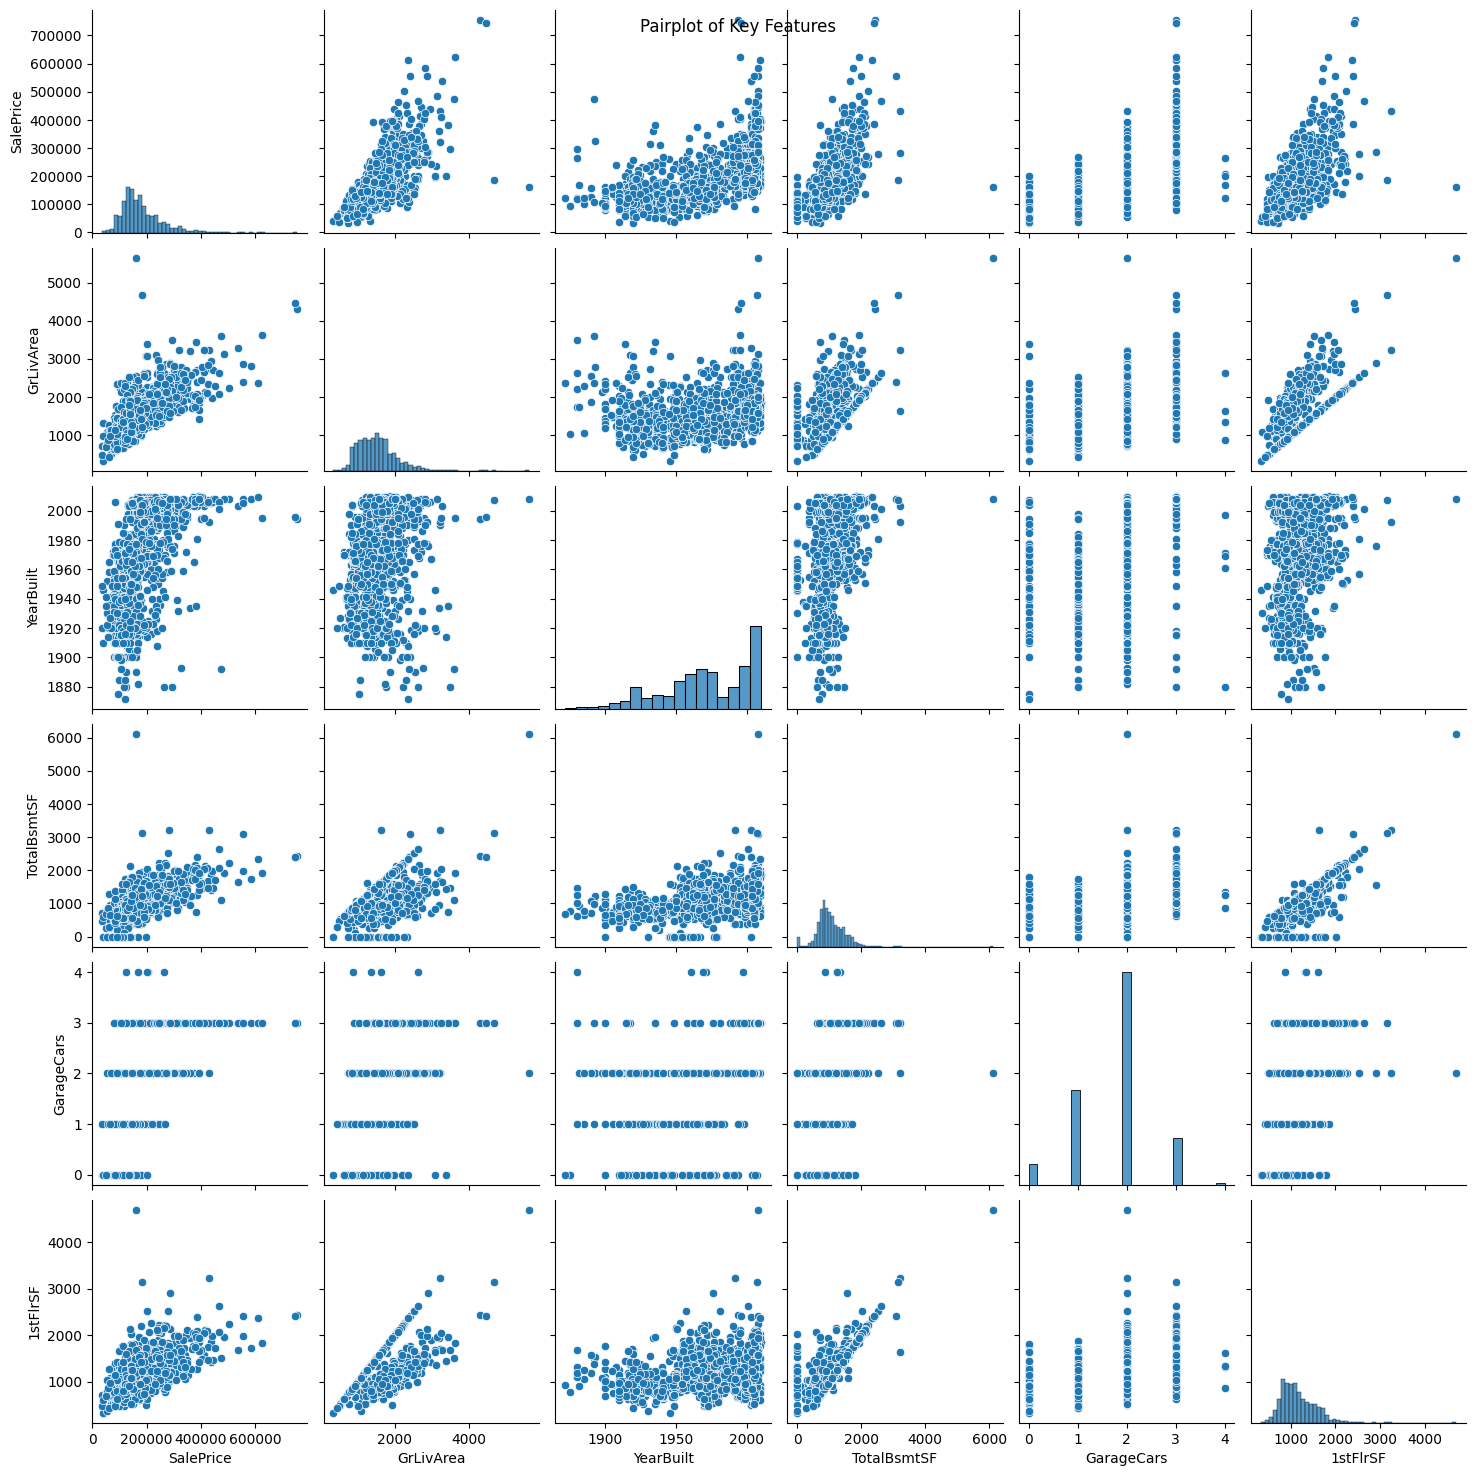

In [123]:
features = ["SalePrice", "GrLivArea", "YearBuilt", "TotalBsmtSF", "GarageCars", "1stFlrSF"]
sns.pairplot(Train[features])
plt.suptitle("Pairplot of Key Features")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


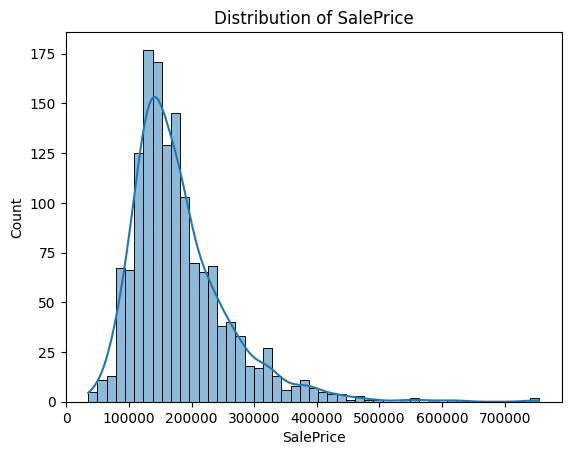

In [124]:
sns.histplot(Train['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


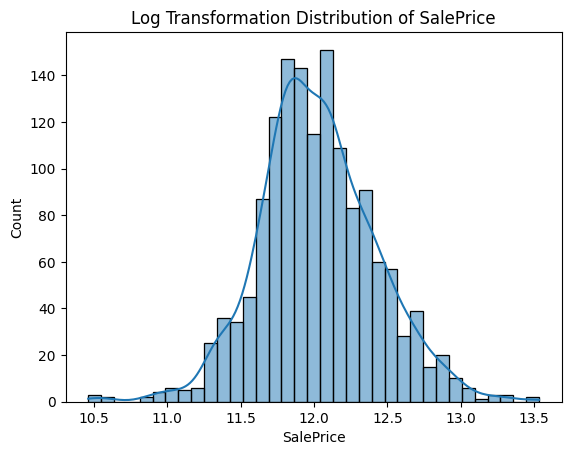

In [125]:
from scipy.stats import skew
if skew(Train['SalePrice'])>0.75:
    Train['SalePrice']=np.log1p(Train['SalePrice'])
    
sns.histplot(Train['SalePrice'], kde=True)
plt.title("Log Transformation Distribution of SalePrice")
plt.show()

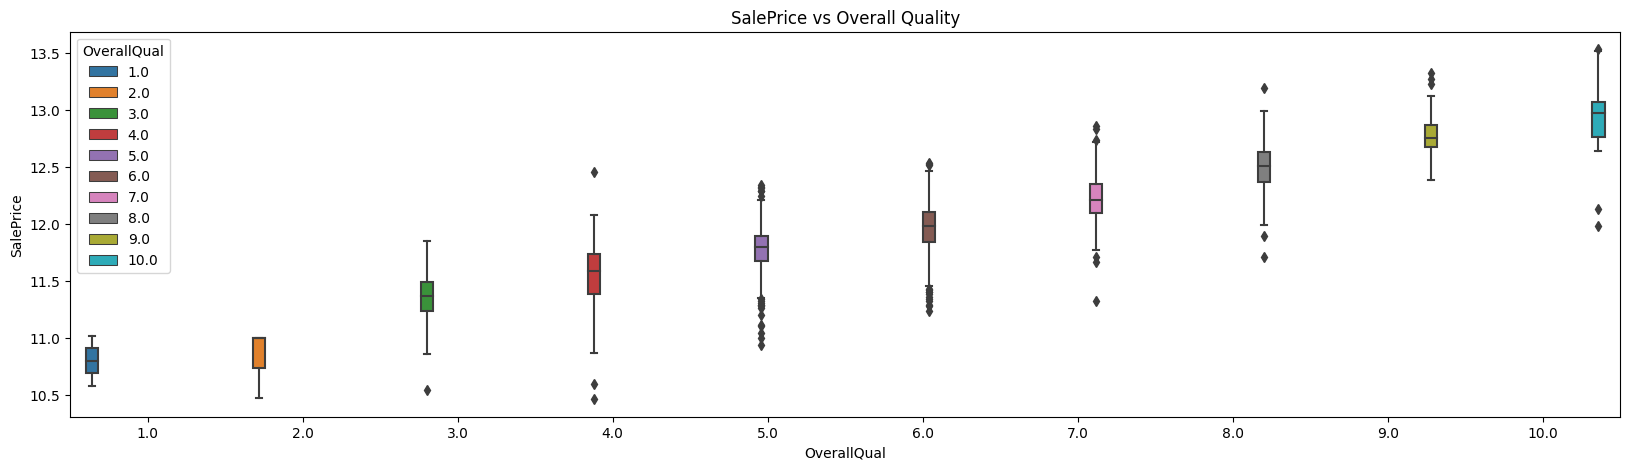

In [126]:
fig=plt.figure(figsize=(20,5))
sns.boxplot(x=Train['OverallQual'], y=Train['SalePrice'], hue=Train['OverallQual'])
plt.title("SalePrice vs Overall Quality")
plt.show()

# Encoding Categorical Data

In [127]:
def encoding(Data):
    Categorical_Cols=[col for col in Data.columns if Data[col].dtypes=='object']
    for k,col in enumerate(Categorical_Cols, start=1):
        print(f'{k}.{col}\t{Data[col].unique()}')
    
    #LabelEncoder
    encoder=LabelEncoder()
    for col in Categorical_Cols:
        Data[col]=encoder.fit_transform(Data[col])

In [128]:
#Encoding Train Data
encoding(Train)

1.MSZoning	['RL' 'RM' 'C (all)' 'FV' 'RH']
2.Street	['Pave' 'Grvl']
3.LotShape	['Reg' 'IR1' 'IR2' 'IR3']
4.LandContour	['Lvl' 'Bnk' 'Low' 'HLS']
5.Utilities	['AllPub' 'NoSeWa']
6.LotConfig	['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
7.LandSlope	['Gtl' 'Mod' 'Sev']
8.Neighborhood	['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
9.Condition1	['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
10.Condition2	['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
11.BldgType	['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
12.HouseStyle	['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
13.RoofStyle	['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
14.RoofMatl	['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
15.Exterior1st	['VinylSd'

In [129]:
#Encoding Test Data
encoding(Test)

1.MSZoning	['RH' 'RL' 'RM' 'FV' 'C (all)']
2.Street	['Pave' 'Grvl']
3.LotShape	['Reg' 'IR1' 'IR2' 'IR3']
4.LandContour	['Lvl' 'HLS' 'Bnk' 'Low']
5.Utilities	['AllPub']
6.LotConfig	['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
7.LandSlope	['Gtl' 'Mod' 'Sev']
8.Neighborhood	['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker']
9.Condition1	['Feedr' 'Norm' 'PosN' 'RRNe' 'Artery' 'RRNn' 'PosA' 'RRAn' 'RRAe']
10.Condition2	['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']
11.BldgType	['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
12.HouseStyle	['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf']
13.RoofStyle	['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed']
14.RoofMatl	['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl']
15.Exterior1st	['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'As

In [130]:
Train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3,65.0,8450.0,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8,4,12.247699
1,20.0,3,80.0,9600.0,1,3,3,0,2,0,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8,4,12.109016
2,60.0,3,68.0,11250.0,1,0,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8,4,12.317171
3,70.0,3,60.0,9550.0,1,0,3,0,0,0,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8,0,11.849405
4,60.0,3,84.0,14260.0,1,0,3,0,2,0,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8,4,12.429220


# Feature Selection

In [131]:
from sklearn.feature_selection import SelectPercentile, mutual_info_regression

X_train = Train.iloc[:,:-1] 
y_train = Train['SalePrice']  

FeatureSelection = SelectPercentile(score_func=mutual_info_regression, percentile=20) 
X_train_selected = FeatureSelection.fit_transform(X_train, y_train)

selected_features1 = X_train.columns[FeatureSelection.get_support()]

X_test = Test.iloc[:,:-1]
X_test_selected = X_test[selected_features1]

print(f'X_train shape           : {X_train.shape}')
print(f'X_train_selected shape  : {X_train_selected.shape}')
print(f'X_test shape            : {X_test.shape}')
print(f'X_test_selected shape   : {X_test_selected.shape}\n')

print(f'Selected Features train :\n{list(selected_features1)}')


X_train shape           : (1460, 74)
X_train_selected shape  : (1460, 15)
X_test shape            : (1459, 72)
X_test_selected shape   : (1459, 15)

Selected Features train :
['MSSubClass', 'Neighborhood', 'OverallQual', 'YearBuilt', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea']


# Splitting DataSet

In [132]:
X_train, X_val, y_train, y_val= train_test_split(X_train_selected, y_train, train_size=0.8, random_state=42)

# Scaling DataSet

In [133]:
scaler=StandardScaler()

X_Train_SC=scaler.fit_transform(X_train)
X_Test_SC=scaler.fit_transform(X_val)

# XGBOOST

In [134]:
xgb_Model = XGBRegressor()
kf=KFold(n_splits=10, shuffle=True, random_state=42)
params={"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2],'max_depth': [3,4,6], 'n_estimators': [500,1000]}
reg_cv = GridSearchCV(xgb_Model, params, verbose=1, cv=kf)
reg_cv.fit(X_Train_SC, y_train)

print(reg_cv.best_params_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
{'colsample_bytree': 1.0, 'max_depth': 4, 'min_child_weight': 1.2, 'n_estimators': 500}


In [135]:
XGB= XGBRegressor(**reg_cv.best_params_)
XGB.fit(X_Train_SC, y_train)

y_train_pred_XGB=XGB.predict(X_Train_SC)
y_val_pred_XGB=XGB.predict(X_Test_SC)

In [136]:
XGB.score(X_Train_SC,y_train)

0.9993609953349627

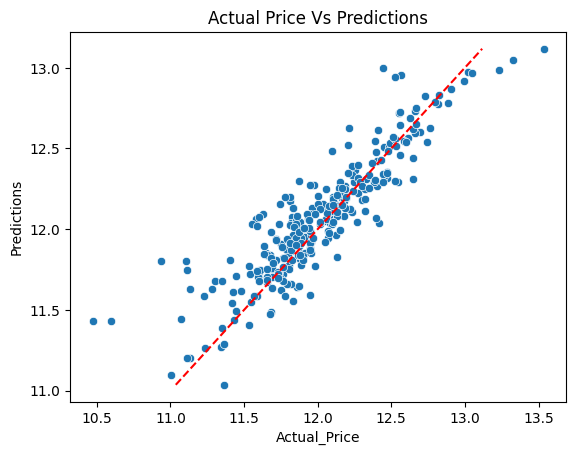

In [137]:
sns.scatterplot(x=y_val, y=y_val_pred_XGB)
plt.plot([y_val_pred_XGB.min(),y_val_pred_XGB.max()], [y_val_pred_XGB.min(),y_val_pred_XGB.max()], 'r--')
plt.xlabel("Actual_Price")
plt.ylabel("Predictions")
plt.title("Actual Price Vs Predictions")
plt.show()

<b>Model Evaluation</b>

In [138]:
print(f'MSE(Mean Square Error)      = {mean_squared_error(y_val,y_val_pred_XGB) :0.2f}')

MSE(Mean Square Error)      = 0.04


# Submit

In [139]:
X_test_scaled = scaler.transform(X_test_selected)
y_test_pred   = XGB.predict(X_test_scaled)



submission_df = pd.DataFrame({
    "Id": Test_Data["Id"],
    "SalePrice": np.expm1(y_test_pred)
})

submission_df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


,Id,SalePrice
0,1461,150039.296875
1,1462,117004.281250
2,1463,183656.640625
3,1464,196606.359375
4,1465,194822.000000


In [141]:
submission_df.to_csv("submission.csv", index=False)